In [41]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Подготовка датасета для загрузки в сеть

In [42]:
base_df = pd.read_csv('data/clean_frame.csv', index_col='ind')
base_df.columns

Index([&#39;ID&#39;, &#39;Код_группы&#39;, &#39;Год_Поступления&#39;, &#39;Год_Окончания_УЗ&#39;, &#39;Пособие&#39;,
       &#39;Общежитие&#39;, &#39;Наличие_Матери&#39;, &#39;Наличие_Отца&#39;, &#39;Опекунство&#39;, &#39;Село&#39;,
       &#39;Иностранец&#39;, &#39;КодФакультета&#39;, &#39;СрБаллАттестата&#39;, &#39;Статус&#39;, &#39;one&#39;,
       &#39;three&#39;, &#39;four&#39;, &#39;male&#39;, &#39;female&#39;, &#39;sex_summ&#39;, &#39;birth_year_int&#39;,
       &#39;basis&#39;, &#39;language&#39;, &#39;country&#39;, &#39;region&#39;, &#39;city&#39;, &#39;parents_country&#39;],
      dtype=&#39;object&#39;)

### Проверка и удаление отрицательных значений

In [43]:
base_df.isna().any().all()

False

In [44]:
base_df = base_df.fillna(0)

In [45]:
columns = ['Код_группы', 'Год_Поступления', 'Год_Окончания_УЗ', 'Пособие',
       'Общежитие', 'Наличие_Матери', 'Наличие_Отца', 'Опекунство', 'Село',
       'Иностранец', 'КодФакультета', 'СрБаллАттестата', 'Статус', 'male', 'female', 'sex_summ', 'birth_year_int','basis', 'language', 'country', 'region', 'city', 'parents_country']

In [46]:
frame_to_train = base_df.loc[:, columns]
frame_to_train.head(2)

,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,Село,Иностранец,...,male,female,sex_summ,birth_year_int,basis,language,country,region,city,parents_country
ind,,,,,,,,,,,,,,,,,,,,,
0,16019,2015,2014.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,1,1,1998,2,1,8,14,74,10
1,14895,2010,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,...,1,0,1,1992,4,0,8,14,74,10


## Создание тренировочного и тестового датафремов

In [47]:
train, test = train_test_split(frame_to_train, test_size=0.20)

train_input = train.drop(['Статус'], axis=1)
train_output = train['Статус']

test_input = test.drop(['Статус'], axis=1)
test_output = test['Статус']

# SKlearn модель обучения

### Тренировка модели без академического отпуска

In [48]:
#clf = RandomForestClassifier(random_state=0)
#clf = ensemble.BaggingClassifier(random_state=0)
clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=20, random_state=0)
clf.fit(train_input, train_output)


GradientBoostingClassifier(learning_rate=0.5, max_depth=20, random_state=0)

## Оценка качества модели

In [49]:
pred = clf.predict(test_input)
report = classification_report(test_output, pred)
print(report)
accure = f1_score(test_output, pred, average='macro', zero_division = 0)
accure

              precision    recall  f1-score   support

          -1       0.57      0.44      0.50       117
           3       0.84      0.82      0.83       903
           4       0.92      0.95      0.93      1697

    accuracy                           0.88      2717
   macro avg       0.78      0.73      0.75      2717
weighted avg       0.88      0.88      0.88      2717



0.753481505966752

### Поиск лучших показателей

In [50]:
columns

[&#39;Код_группы&#39;,
 &#39;Год_Поступления&#39;,
 &#39;Год_Окончания_УЗ&#39;,
 &#39;Пособие&#39;,
 &#39;Общежитие&#39;,
 &#39;Наличие_Матери&#39;,
 &#39;Наличие_Отца&#39;,
 &#39;Опекунство&#39;,
 &#39;Село&#39;,
 &#39;Иностранец&#39;,
 &#39;КодФакультета&#39;,
 &#39;СрБаллАттестата&#39;,
 &#39;Статус&#39;,
 &#39;male&#39;,
 &#39;female&#39;,
 &#39;sex_summ&#39;,
 &#39;birth_year_int&#39;,
 &#39;basis&#39;,
 &#39;language&#39;,
 &#39;country&#39;,
 &#39;region&#39;,
 &#39;city&#39;,
 &#39;parents_country&#39;]

In [51]:
col_weight = columns
col_weight.remove('Статус')

&lt;AxesSubplot:&gt;

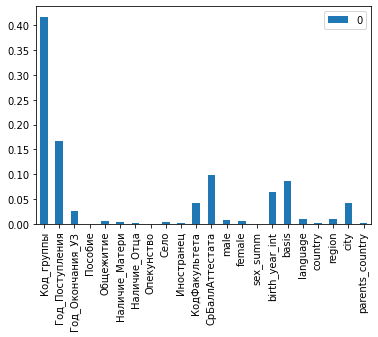

In [56]:
feature_weight = clf.feature_importances_
fet_weight = pd.DataFrame(feature_weight, index=col_weight)
fet_weight.plot.bar()

In [53]:
clf.__str__().split('(')[0]

&#39;GradientBoostingClassifier&#39;

## Формирование файла для загрузки на сайт

In [54]:
df_test_base = pd.read_csv("data/test_frame.csv")
df_submission = pd.read_csv("data/sample_submission.csv")

In [55]:
df_test = df_test_base.loc[:, columns]
df_test = df_test.drop(['Статус',], axis=1)
df_test

KeyError: &quot;Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index([&#39;region&#39;, &#39;city&#39;], dtype=&#39;object&#39;). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike&quot;

In [13]:
df_test = df_test.fillna(0)
df_test.shape

(6635, 7)

In [14]:
df_test_pred = clf.predict(df_test)

In [15]:
df_test_base["Статус"] = df_test_pred
df_test_base.head(4)

,ind,ID,Код_группы,Год_Поступления,Год_Окончания_УЗ,Пособие,Общежитие,Наличие_Матери,Наличие_Отца,Опекунство,...,СрБаллАттестата,male,female,sex_summ,birth_year_int,Статус,basis,language,country,parents_country
0,0,64996,20608,2014,2014.0,0.0,0.0,0,0.0,0.0,...,49.0,0,1,1,1995,4,1,1,8,10
1,1,71837,20613,2015,2014.0,0.0,0.0,0,0.0,0.0,...,77.0,0,1,1,1995,4,1,2,8,10
2,2,86587,21210,2018,1997.0,0.0,0.0,1,1.0,0.0,...,74.0,0,1,1,1973,3,2,1,8,10
3,3,73673,22254,2015,2006.0,0.0,0.0,0,0.0,0.0,...,57.0,0,1,1,1983,3,2,1,8,10


In [16]:
df_submission

,ID,Статус
0,64996,NaN
1,71837,NaN
2,86587,NaN
3,73673,NaN
4,54709,NaN
...,...,...
6686,74342,NaN
6687,54876,NaN
6688,66879,NaN
6689,64982,NaN


In [17]:
make_csv = df_test_base.loc[:, ['ID', 'Статус']]
#make_csv['reg'] = np.arange(0, make_csv.shape[0])
make_csv

,ID,Статус
0,64996,4
1,71837,4
2,86587,3
3,73673,3
4,54709,4
...,...,...
6630,74342,4
6631,54876,4
6632,66879,4
6633,64982,4


In [18]:
for i in range(df_submission.shape[0]):
    id_hum = df_submission.loc[i, ['ID']]
    #print(id_hum)
    status = make_csv.loc[make_csv['ID'] == id_hum.values[0], 'Статус']
    try:
        df_submission.loc[i, ['Статус']] = status.values[0]
    except:
        df_submission.loc[i, ['Статус']] = 4
    print(df_submission.loc[i, ['Статус']])

  4.0
Name: 6203, dtype: float64
Статус    4.0
Name: 6204, dtype: float64
Статус    4.0
Name: 6205, dtype: float64
Статус    3.0
Name: 6206, dtype: float64
Статус    4.0
Name: 6207, dtype: float64
Статус    4.0
Name: 6208, dtype: float64
Статус    4.0
Name: 6209, dtype: float64
Статус    3.0
Name: 6210, dtype: float64
Статус    4.0
Name: 6211, dtype: float64
Статус    4.0
Name: 6212, dtype: float64
Статус    4.0
Name: 6213, dtype: float64
Статус   -1.0
Name: 6214, dtype: float64
Статус    4.0
Name: 6215, dtype: float64
Статус    4.0
Name: 6216, dtype: float64
Статус    4.0
Name: 6217, dtype: float64
Статус    4.0
Name: 6218, dtype: float64
Статус    3.0
Name: 6219, dtype: float64
Статус    4.0
Name: 6220, dtype: float64
Статус    4.0
Name: 6221, dtype: float64
Статус    3.0
Name: 6222, dtype: float64
Статус    3.0
Name: 6223, dtype: float64
Статус    3.0
Name: 6224, dtype: float64
Статус    3.0
Name: 6225, dtype: float64
Статус    4.0
Name: 6226, dtype: float64
Статус    3.0
Name: 6227

In [19]:
value = f'{accure:.4f}'
method = clf.__str__().split('(')[0]
col_name = "_".join(columns)
df_submission.to_csv(f'data/result/{value}_{method}_{col_name}.csv', index=False)